In [1]:
#clone darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14621, done.
remote: Total 14621 (delta 0), reused 0 (delta 0), pack-reused 14621
Receiving objects: 100% (14621/14621), 13.21 MiB | 23.82 MiB/s, done.
Resolving deltas: 100% (9955/9955), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Show all my google drive contents
#%cd ..
#Symlink
!ln -s /content/drive/My\ Drive/ mydrive
!ls mydrive/

 16804914_1086183471504587_676718626_o.jpg
 5thSem_MiniProject_Report.gdoc
 7th_SUM_PRO.gdoc
 8SemSummer
 8thSemSummerProject_Nilotpal.gdoc
 9thSemester_SummerProject_Nilotpal_IRM2016501.gslides
 9thSemester_Thesis_Nilotpal_IRM2016501.gslides
 9thSem_SummerProject_IRM2016501_Nilotpal.gdoc
 9thSem_Thesis_IRM2016501_Nilotpal.gdoc
 acc.gslides
'According to the problem we have to write an efficient algorithm to merge two given large Heaps of different sizes to create one large Heap.gdoc'
'Adressing Review.docx'
'Adressing Review.odt'
'Algorithm Design_2.gdoc'
 ANN2_ML.drawio
 Annexure_3_Tentative.pdf
 ANN_Perceptron_LogicGates.gdoc
 ANN_XNOR.gdoc
 application_new.gdoc
'A Real-Time Smart City Map.gdoc'
'Assignment_IRM2016501 (1).zip'
'Assignment_IRM2016501 (2).zip'
'Assignment_IRM2016501 (3).zip'
'Assignment_IRM2016501 (4).zip'
 Assignment_IRM2016501.zip
'Assignments on Linear Regression #3'
 Attendance.gsheet
'BAM (1).ipynb'
 BAM.gdoc
 BAM.ipynb
'BH3 Mess Menu.docx'
'BH3 Mess Menu.gdoc'
'

In [4]:
!ls

darknet  drive	mydrive  sample_data


In [5]:
!cp mydrive/yolov3/yolov3.weights /../content/darknet

In [6]:
#change makefile for gpu and opencv
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile


/content/darknet


In [7]:
#cuda verification
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [8]:
#build darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [9]:
#getting pretrained weights of coco
#!wget https://pjreddie.com/media/files/yolov3.weights

In [10]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [12]:
!pwd

/content


In [13]:
!cp /content/mydrive/yolov3/obj.data /content/darknet/data/
!cp /content/mydrive/yolov3/obj.names /content/darknet/data/
!cp /content/mydrive/yolov3/yolov3_obj.cfg /content/darknet
!cp /content/mydrive/yolov3/backup/yolov3_obj_final.weights /content/darknet

In [14]:
!pwd

/content


In [38]:
%cd ..
%cd /content/darknet/
!./darknet detector test data/obj.data yolov3_obj.cfg yolov3_obj_final.weights

/content
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Lay

In [39]:
!./darknet detector map data/obj.data yolov3_obj.cfg yolov3_obj_final.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, ou

[Errno 20] Not a directory: 'darknet/'
/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 

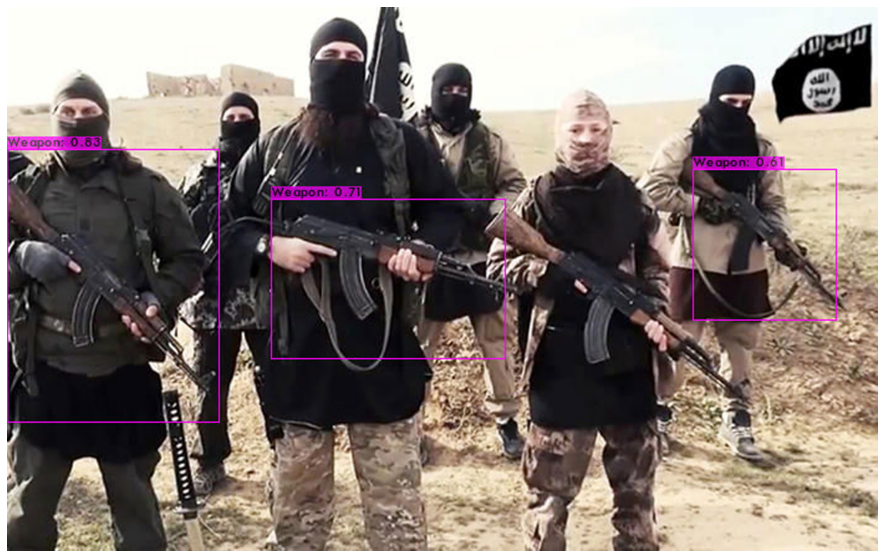

In [40]:
#test compiled darknet using image from drive

%cd darknet/
!./darknet detect /../content/mydrive/yolov3/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights w2.jpg
imShow('predictions.jpg')